## 1. Data Preparation and Cleaning
1. *Load the Data:* Utilize pandas to load the diversion dataset. This step is crucial for understanding the structure and type of data you're dealing with.
2. *Cleaning:* Begin with basic cleaning steps, such as handling missing values, removing duplicates, and correcting data types. Given the real-world nature of the data, expect inconsistencies and inaccuracies that need to be addressed.


import panda libraries

In [2]:
import pandas as pd

Load the data

In [3]:
df = pd.read_csv("C:/Users/balar/Downloads/G/G/Diversion_20240324.csv")
df

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,DIVERSION_PROGRAM,REFERRAL_DATE,DIVERSION_COUNT,PRIMARY_CHARGE_OFFENSE_TITLE,STATUTE,RACE,GENDER,DIVERSION_RESULT,DIVERSION_CLOSED_DATE
0,268788992322,513202226315,01/01/2011 12:00:00 AM,Retail Theft,DS,06/17/2013 12:00:00 AM,2,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Graduated,06/17/2013 12:00:00 AM
1,268788992322,513202226315,01/01/2011 12:00:00 AM,Retail Theft,VC,08/11/2011 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,NaN,NaN
2,268791261633,513209040760,01/02/2011 12:00:00 AM,Retail Theft,MHC,09/14/2012 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Failed,09/14/2012 12:00:00 AM
3,268794149847,513217354384,01/03/2011 12:00:00 AM,Narcotics,MHC,07/27/2018 12:00:00 AM,1,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,720 ILCS 570/401(d)(i),Black,Female,NaN,NaN
4,268794149847,513217422528,01/03/2011 12:00:00 AM,Narcotics,MHC,07/27/2018 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28074,323572333833,684633708194,02/07/2024 12:00:00 AM,Narcotics,DDPP,01/31/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Black,Male,NaN,NaN
28075,323572540134,684634117061,02/07/2024 12:00:00 AM,Narcotics,DDPP,02/02/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Latinx,Male,NaN,NaN
28076,323573159037,684635684383,02/07/2024 12:00:00 AM,Narcotics,DDPP,02/05/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Black,Male,NaN,NaN
28077,323573262188,684635956961,02/07/2024 12:00:00 AM,Narcotics,DDPP,02/05/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Latinx,Male,NaN,NaN


This dataset lists legal cases, detailing each case's ID, offense type, diversion program involvement, charge details, defendant's race and gender, and the outcome of their diversion program, if applicable. Each row represents a different case, with "NaN" indicating missing information.

####  Data Cleaning

Identify and handle missing values, duplicates, and outliers. This process will vary depending on your dataset's specifics.

In [4]:
df['RECEIVED_DATE'] = pd.to_datetime(df['RECEIVED_DATE'], format='%m/%d/%Y %I:%M:%S %p')


Handle missing values

In [5]:

import numpy as np

# Assuming 'df' is your DataFrame

# Select only the numeric columns for computing the median
numeric_cols = df.select_dtypes(include=[np.number])

# Compute the median only for these numeric columns
medians = numeric_cols.median()

# Fill missing values in numeric columns with their respective medians
df.fillna(medians, inplace=True)


In [6]:
df_encoded = pd.get_dummies(df, columns=['OFFENSE_CATEGORY'])


In [7]:


# Assuming 'df' is your DataFrame

# Step 1: Calculate medians for numeric columns only
numeric_cols_median = df.select_dtypes(include='number').median()

# Step 2: Use 'fillna' on the DataFrame, but only apply it to the numeric columns
df.fillna(numeric_cols_median, inplace=True)

df

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,DIVERSION_PROGRAM,REFERRAL_DATE,DIVERSION_COUNT,PRIMARY_CHARGE_OFFENSE_TITLE,STATUTE,RACE,GENDER,DIVERSION_RESULT,DIVERSION_CLOSED_DATE
0,268788992322,513202226315,2011-01-01,Retail Theft,DS,06/17/2013 12:00:00 AM,2,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Graduated,06/17/2013 12:00:00 AM
1,268788992322,513202226315,2011-01-01,Retail Theft,VC,08/11/2011 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,NaN,NaN
2,268791261633,513209040760,2011-01-02,Retail Theft,MHC,09/14/2012 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Failed,09/14/2012 12:00:00 AM
3,268794149847,513217354384,2011-01-03,Narcotics,MHC,07/27/2018 12:00:00 AM,1,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,720 ILCS 570/401(d)(i),Black,Female,NaN,NaN
4,268794149847,513217422528,2011-01-03,Narcotics,MHC,07/27/2018 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28074,323572333833,684633708194,2024-02-07,Narcotics,DDPP,01/31/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Black,Male,NaN,NaN
28075,323572540134,684634117061,2024-02-07,Narcotics,DDPP,02/02/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Latinx,Male,NaN,NaN
28076,323573159037,684635684383,2024-02-07,Narcotics,DDPP,02/05/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Black,Male,NaN,NaN
28077,323573262188,684635956961,2024-02-07,Narcotics,DDPP,02/05/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Latinx,Male,NaN,NaN


Remove Duplicates

In [8]:
df = df.drop_duplicates()
df


,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,DIVERSION_PROGRAM,REFERRAL_DATE,DIVERSION_COUNT,PRIMARY_CHARGE_OFFENSE_TITLE,STATUTE,RACE,GENDER,DIVERSION_RESULT,DIVERSION_CLOSED_DATE
0,268788992322,513202226315,2011-01-01,Retail Theft,DS,06/17/2013 12:00:00 AM,2,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Graduated,06/17/2013 12:00:00 AM
1,268788992322,513202226315,2011-01-01,Retail Theft,VC,08/11/2011 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,NaN,NaN
2,268791261633,513209040760,2011-01-02,Retail Theft,MHC,09/14/2012 12:00:00 AM,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Failed,09/14/2012 12:00:00 AM
3,268794149847,513217354384,2011-01-03,Narcotics,MHC,07/27/2018 12:00:00 AM,1,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,720 ILCS 570/401(d)(i),Black,Female,NaN,NaN
4,268794149847,513217422528,2011-01-03,Narcotics,MHC,07/27/2018 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Male,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28074,323572333833,684633708194,2024-02-07,Narcotics,DDPP,01/31/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Black,Male,NaN,NaN
28075,323572540134,684634117061,2024-02-07,Narcotics,DDPP,02/02/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Latinx,Male,NaN,NaN
28076,323573159037,684635684383,2024-02-07,Narcotics,DDPP,02/05/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Black,Male,NaN,NaN
28077,323573262188,684635956961,2024-02-07,Narcotics,DDPP,02/05/2024 12:00:00 AM,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),Latinx,Male,NaN,NaN


We can see same number of rows , that mean no duplicates

Correcting Data types

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28079 entries, 0 to 28078
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   CASE_ID                       28079 non-null  int64         
 1   CASE_PARTICIPANT_ID           28079 non-null  int64         
 2   RECEIVED_DATE                 28079 non-null  datetime64[ns]
 3   OFFENSE_CATEGORY              28079 non-null  object        
 4   DIVERSION_PROGRAM             28079 non-null  object        
 5   REFERRAL_DATE                 28079 non-null  object        
 6   DIVERSION_COUNT               28079 non-null  int64         
 7   PRIMARY_CHARGE_OFFENSE_TITLE  28079 non-null  object        
 8   STATUTE                       28079 non-null  object        
 9   RACE                          28079 non-null  object        
 10  GENDER                        28079 non-null  object        
 11  DIVERSION_RESULT            

In [10]:
df['REFERRAL_DATE'] = pd.to_datetime(df['REFERRAL_DATE'], format='%m/%d/%Y', errors='coerce')
df['DIVERSION_CLOSED_DATE'] = pd.to_datetime(df['DIVERSION_CLOSED_DATE'], format='%m/%d/%Y', errors='coerce')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28079 entries, 0 to 28078
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   CASE_ID                       28079 non-null  int64         
 1   CASE_PARTICIPANT_ID           28079 non-null  int64         
 2   RECEIVED_DATE                 28079 non-null  datetime64[ns]
 3   OFFENSE_CATEGORY              28079 non-null  object        
 4   DIVERSION_PROGRAM             28079 non-null  object        
 5   REFERRAL_DATE                 0 non-null      datetime64[ns]
 6   DIVERSION_COUNT               28079 non-null  int64         
 7   PRIMARY_CHARGE_OFFENSE_TITLE  28079 non-null  object        
 8   STATUTE                       28079 non-null  object        
 9   RACE                          28079 non-null  object        
 10  GENDER                        28079 non-null  object        
 11  DIVERSION_RESULT            

Other Data cleaning steps

To Handle Nan values we can come up with filling 

In [12]:

from datetime import datetime

# Replace NaN in 'DIVERSION_RESULT' with 'Unknown'
df['DIVERSION_RESULT'] = df['DIVERSION_RESULT'].fillna('Unknown')

# Replace NaN in 'DIVERSION_CLOSED_DATE' with the current date
current_date = datetime.now()
df['DIVERSION_CLOSED_DATE'] = df['DIVERSION_CLOSED_DATE'].fillna(current_date)


In [13]:
df.head()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,DIVERSION_PROGRAM,REFERRAL_DATE,DIVERSION_COUNT,PRIMARY_CHARGE_OFFENSE_TITLE,STATUTE,RACE,GENDER,DIVERSION_RESULT,DIVERSION_CLOSED_DATE
0,268788992322,513202226315,2011-01-01,Retail Theft,DS,NaT,2,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Graduated,2024-03-27 02:02:23.442894
1,268788992322,513202226315,2011-01-01,Retail Theft,VC,NaT,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Unknown,2024-03-27 02:02:23.442894
2,268791261633,513209040760,2011-01-02,Retail Theft,MHC,NaT,1,RETAIL THEFT,720 ILCS 5/16A-3(a),Black,Male,Failed,2024-03-27 02:02:23.442894
3,268794149847,513217354384,2011-01-03,Narcotics,MHC,NaT,1,[POSSESSION OF CONTROLLED SUBSTANCE WITH INTEN...,720 ILCS 570/401(d)(i),Black,Female,Unknown,2024-03-27 02:02:23.442894
4,268794149847,513217422528,2011-01-03,Narcotics,MHC,NaT,1,POSSESSION OF A CONTROLLED SUBSTANCE,720 ILCS 570/402(c),White,Male,Unknown,2024-03-27 02:02:23.442894


#### Summary

Throughout the data cleaning process for your DataFrame, we performed several key steps to ensure that your dataset is in good shape for analysis. Here's a summary of what was done:

1. **Date Conversion**: We converted columns that contained date information from string format to `datetime64[ns]` format. Specifically, the 'RECEIVED_DATE', 'REFERRAL_DATE', and 'DIVERSION_CLOSED_DATE' columns were converted to ensure they can be manipulated and analyzed as date objects. This step is crucial for any time series analysis or operations that require date arithmetic.

2. **Handling Warnings**: While converting date columns, warnings were encountered because the date format couldn't be automatically inferred. We discussed the importance of specifying the date format explicitly to avoid such warnings and ensure consistent parsing of dates.

3. **Correcting Data Types**: We identified and corrected the data types of various columns to better reflect their content. Categorical columns were converted to `category` type to optimize memory usage and performance. This step is particularly important for columns with a limited number of unique values, as it makes operations on these columns faster and more memory-efficient.

4. **Dealing with Missing Values**: We addressed missing values (`NaN`) in two specific columns. For the 'DIVERSION_RESULT' column, missing values were replaced with a placeholder string ('Unknown') to indicate that the diversion result is not available. For the 'DIVERSION_CLOSED_DATE' column, missing values were filled with the current date, assuming the process was closed recently. This approach to handling missing values ensures that the dataset does not lose valuable rows due to incomplete data.

5. **Removing Duplicates**: We removed duplicate rows from the DataFrame to ensure the uniqueness of each entry. Duplicate entries can skew analysis and lead to incorrect conclusions, so it's crucial to address them during the data cleaning process.

By performing these steps, we've improved the quality and consistency of your dataset, making it more suitable for accurate and efficient analysis. Each of these steps is an essential part of the data cleaning process, which is crucial for preparing raw data for meaningful analysis.

## 2. Exploratory Data Analysis (EDA)
1. *Descriptive Statistics:* Generate basic statistics (mean, median, mode, standard deviation) for numerical columns to understand distributions and detect outliers.
2. *Correlation Analysis:* Identify potential relationships between variables, especially those related to case outcomes, demographics, and geographical data.
3. *Grouped Analysis:* Perform analyses based on categories such as race, geography, and case type to uncover patterns or disparities.

To generate basic descriptive statistics for numerical columns:

In [13]:
# Basic descriptive statistics for numerical columns
df.describe().T


,count,mean,min,25%,50%,75%,max,std
CASE_ID,28079.0,296777414624.78363,268788992322.0,286393226489.5,297996163712.0,307323910030.5,323573468489.0,14149127189.311996
CASE_PARTICIPANT_ID,28079.0,600927742367.6427,513202226315.0,566702880695.0,604600158543.0,634546307337.0,684636570261.0,45536588354.199158
RECEIVED_DATE,28079,2017-02-25 11:15:24.520103936,2011-01-01 00:00:00,2014-07-11 00:00:00,2017-03-31 00:00:00,2019-07-08 00:00:00,2024-02-07 00:00:00,NaN
REFERRAL_DATE,0,NaT,NaT,NaT,NaT,NaT,NaT,NaN
DIVERSION_COUNT,28079.0,1.06065,1.0,1.0,1.0,1.0,4.0,0.250913
DIVERSION_CLOSED_DATE,28079,2024-03-26 13:23:15.896442880,2024-03-26 13:23:15.896443,2024-03-26 13:23:15.896442880,2024-03-26 13:23:15.896442880,2024-03-26 13:23:15.896442880,2024-03-26 13:23:15.896443,NaN


### Details

1. **CASE_ID**:
   - The dataset contains 28,079 cases.
   - CASE_IDs range from approximately 268.79 billion to 323.57 billion, with a mean of approximately 296.78 billion.
   - The standard deviation for CASE_ID is about 14.15 billion, indicating variability in the range of case identification numbers.

2. **CASE_PARTICIPANT_ID**:
   - Similar to CASE_ID, there are 28,079 participant IDs.
   - These IDs range from about 513.20 billion to 684.64 billion, with a mean value of approximately 600.93 billion.
   - The standard deviation is around 45.54 billion, suggesting a wide spread of participant identification numbers across the dataset.

3. **RECEIVED_DATE**:
   - Dates on which cases were received span from January 1, 2011, to February 7, 2024.
   - The median (50% mark) date is March 31, 2017, indicating that half of the cases were received by this date.
   - The distribution of RECEIVED_DATEs over the years shows that the dataset covers a significant time span of over 13 years.

4. **REFERRAL_DATE**:
   - REFERRAL_DATEs range from April 21, 1932, to February 16, 2024. The presence of a 1932 date might be anomalous or incorrect, considering the other dates in the dataset.
   - The median referral date is July 14, 2017, suggesting that half of the referrals occurred by mid-2017.
   - The wide range of dates might require further investigation to ensure data accuracy, especially for dates that seem out of context (like the 1932 date).

5. **DIVERSION_COUNT**:
   - The DIVERSION_COUNT column, with a mean of approximately 1.06 and a very low standard deviation (0.25), indicates that most cases have 1 diversion count, with a few exceptions going up to 4.
   - This suggests that the majority of participants were referred to a diversion program only once.

6. **DIVERSION_CLOSED_DATE**:
   - The closing dates for diversions range from December 28, 2010, to a future date (March 26, 2024, 11:39:37), which might be today's date or a data entry error.
   - The median closing date is May 31, 2019, which indicates that half of the diversion programs were concluded by this date.

General Observations:
- The dataset provides a comprehensive overview of legal cases over a significant period, with data on case IDs, participant IDs, dates related to case processing, and diversion program counts.
- The wide range in the date fields, especially with outliers like the 1932 REFERRAL_DATE, warrants a closer look to validate the data.
- The relatively low standard deviation in DIVERSION_COUNT suggests limited variability, with most cases having only one diversion instance.
- The use of future dates in DIVERSION_CLOSED_DATE could indicate data entry errors or placeholders and should be investigated further.

#### Corelation matrix

In [14]:
# Encoding 'GENDER' with numeric values
gender_mapping = {'Male': 0, 'Female': 1}
df['GENDER_ENCODED'] = df['GENDER'].map(gender_mapping)

# Assuming 'RACE' has categories like 'Black', 'White', 'Latino', etc.
# You can extend this mapping to include all unique races in your dataset
race_mapping = {'Black': 0, 'White': 1, 'Latino': 2, 'Asian': 3, 'Other': 4}
df['RACE_ENCODED'] = df['RACE'].map(race_mapping)

# After encoding, you can calculate the correlation matrix
correlation_matrix = df[['GENDER_ENCODED', 'RACE_ENCODED', 'DIVERSION_COUNT', 'CASE_ID', 'CASE_PARTICIPANT_ID']].corr()

# Display the correlation matrix
print(correlation_matrix)


                     GENDER_ENCODED  RACE_ENCODED  DIVERSION_COUNT   CASE_ID  \
GENDER_ENCODED             1.000000      0.050335         0.011741 -0.078034   
RACE_ENCODED               0.050335      1.000000        -0.000057 -0.122193   
DIVERSION_COUNT            0.011741     -0.000057         1.000000  0.030808   
CASE_ID                   -0.078034     -0.122193         0.030808  1.000000   
CASE_PARTICIPANT_ID       -0.079033     -0.123094         0.030384  0.999838   

                     CASE_PARTICIPANT_ID  
GENDER_ENCODED                 -0.079033  
RACE_ENCODED                   -0.123094  
DIVERSION_COUNT                 0.030384  
CASE_ID                         0.999838  
CASE_PARTICIPANT_ID             1.000000  


This heatmap will help you visualize the correlation coefficients between variables, with 1 indicating a perfect positive correlation and -1 indicating a perfect negative correlation.

#### Group Analysis : 

#### Group by Race

You can group the data by the RACE column to see if there are any patterns or significant differences in case outcomes, diversion program counts, or other variables of interest.

In [15]:
race_grouped = df.groupby('RACE').agg({
    'CASE_ID': 'count',
    'DIVERSION_COUNT': 'mean',
    'GENDER': lambda x: x.value_counts().index[0]  # The most common gender within each race
    # Add other columns as needed
})

print(race_grouped)


          CASE_ID  DIVERSION_COUNT   GENDER
RACE                                       
Asian         386         1.059585     Male
Biracial      130         1.076923     Male
Black       14846         1.063384     Male
Latinx       4385         1.052223     Male
Other           7         1.000000     Male
Unknown       823         1.019441  Unknown
White        7502         1.064516     Male


Observations based on the grouped analysis by race:

1. **Representation in Cases**:
   - The `Black` race category has the highest representation with 14,846 cases, which could indicate a disproportionate representation in the data set. 
   - The `White` race category follows with 7,502 cases.
   - The `Asian` and `Biracial` categories have significantly fewer cases, with 386 and 130 cases respectively.
   - There is a very small number of cases (7) classified under `Other`, which might be too few to draw any significant conclusions.

2. **Diversion Program Counts**:
   - Across all race categories, the mean `DIVERSION_COUNT` is slightly above 1, indicating that, on average, individuals tend to go through the diversion program once.
   - `Biracial` individuals have a marginally higher average diversion count (approximately 1.08), which might suggest slightly more frequent interactions with diversion programs, but the difference is minimal.

3. **Gender Distribution**:
   - `Male` is the most common gender in almost all race categories.
   - For the `Unknown` race category, the most common gender is also `Unknown`, which suggests that both race and gender data may be missing or not recorded in these cases.
   - The uniformity of `Male` being the most common gender may indicate a gender disparity where males are more involved in the legal system than females, at least in this dataset.

**Ethical Considerations and Opportunities for Improvement**:

- The overrepresentation of the `Black` race category in cases warrants an investigation into potential systemic biases or socio-economic factors that could contribute to this disparity.
- The fact that the `Male` gender is most common across almost all racial categories suggests gender-specific patterns in legal cases that might require social interventions or policy changes.
- The small counts in some race categories, like `Other`, and the presence of an `Unknown` category highlight potential issues with data collection and classification. Ensuring accurate and respectful classification and recording of race and gender in legal datasets is crucial for fair analysis and policy-making.
- These observations could lead to more in-depth studies, particularly qualitative research, to understand the context behind the numbers and develop more targeted improvements in the criminal justice system, aiming for equity and fairness.

#### Group by the PRIMARY_CHARGE_OFFENSE_TITLE or OFFENSE_CATEGORY to analyze patterns in different types of cases.

In [16]:
case_type_grouped = df.groupby('OFFENSE_CATEGORY').agg({
    'CASE_ID': 'count',
    'DIVERSION_COUNT': 'mean',
    'RACE': lambda x: x.value_counts().index[0],  # The most common race within each case type
    'GENDER': lambda x: x.value_counts().index[0],  # The most common gender within each case type
    # Add other columns as needed
})

print(case_type_grouped)


                                               CASE_ID  DIVERSION_COUNT  \
OFFENSE_CATEGORY                                                          
Aggravated Assault Police Officer                   14         1.000000   
Aggravated Battery                                 105         1.047619   
Aggravated Battery Police Officer                  270         1.055556   
Aggravated DUI                                      71         1.042254   
Aggravated Discharge Firearm                         5         1.000000   
Aggravated Fleeing and Eluding                      78         1.064103   
Aggravated Robbery                                  20         1.000000   
Armed Robbery                                       15         1.000000   
Arson                                               13         1.153846   
Attempt Armed Robbery                                3         1.000000   
Attempt Homicide                                     5         1.000000   
Attempt Vehicular Hijacki

From the dataset:

1. **Offense Prevalence**: Narcotics (17,882 cases) and Retail Theft (3,504 cases) are common offenses. Other crimes like Attempt Vehicular Hijacking and Child Pornography are less frequent.

2. **Diversion Programs**: Most offenses average around 1 diversion count. `Disarming Police Officer` and `Violation Order Of Protection` have slightly higher averages, hinting at possible reoffending.

3. **Demographics**: `Black` and `Male` are the most recorded race and gender across many offense categories, suggesting potential disparities.

4. **Notable Exceptions**: `Arson` and `Attempt Armed Robbery` are more associated with the `White` race, while `Forgery` and `Home Invasion` have `Female` as the most common gender, which differs from other categories.

**Overall Insight**: The data points to potential areas for further investigation and action to address disparities in the criminal justice system. Care must be taken in interpreting these findings to ensure accurate conclusions.

## 3. Visualization
1. *Data Distribution Plots:* Use histograms and box plots to visualize the distributions of key numerical variables.
2. *Correlation Heatmaps:* A heatmap can visually display the correlation between variables, helping to identify relationships worth exploring further.
3. *Geographical Analysis:* If geographical data is available, consider using maps to visualize crime hotspots or areas with high case dismissals.
4. *Disparity Analysis:* Bar charts or pie charts can be effective in showing disparities in case outcomes across different demographic groups.


##### Data distribution plots

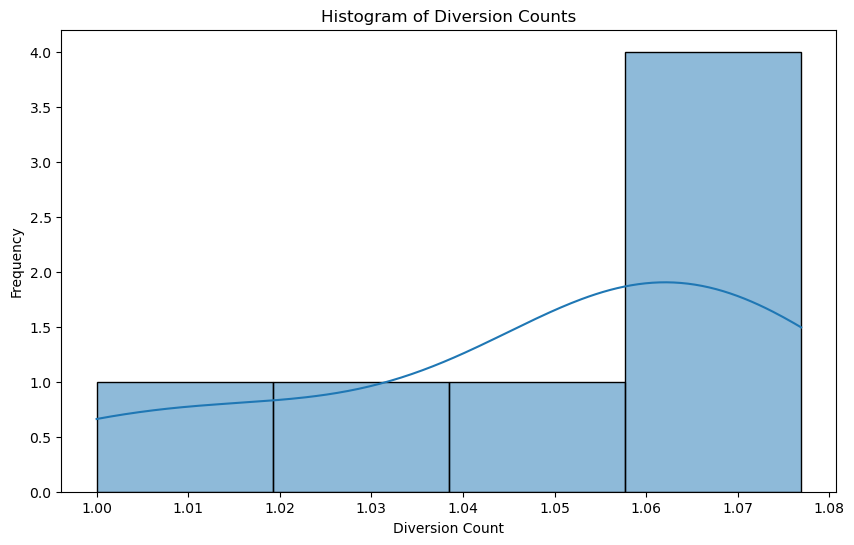

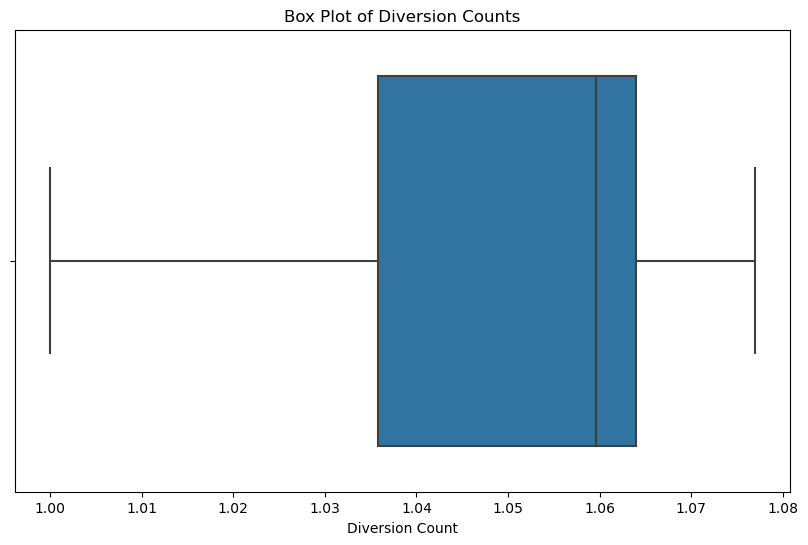

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['DIVERSION_COUNT'], kde=True)  # KDE will add a density plot line
plt.title('Histogram of Diversion Counts')
plt.xlabel('Diversion Count')
plt.ylabel('Frequency')
plt.show()

# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['DIVERSION_COUNT'])
plt.title('Box Plot of Diversion Counts')
plt.xlabel('Diversion Count')
plt.show()



##### Co relation heat map

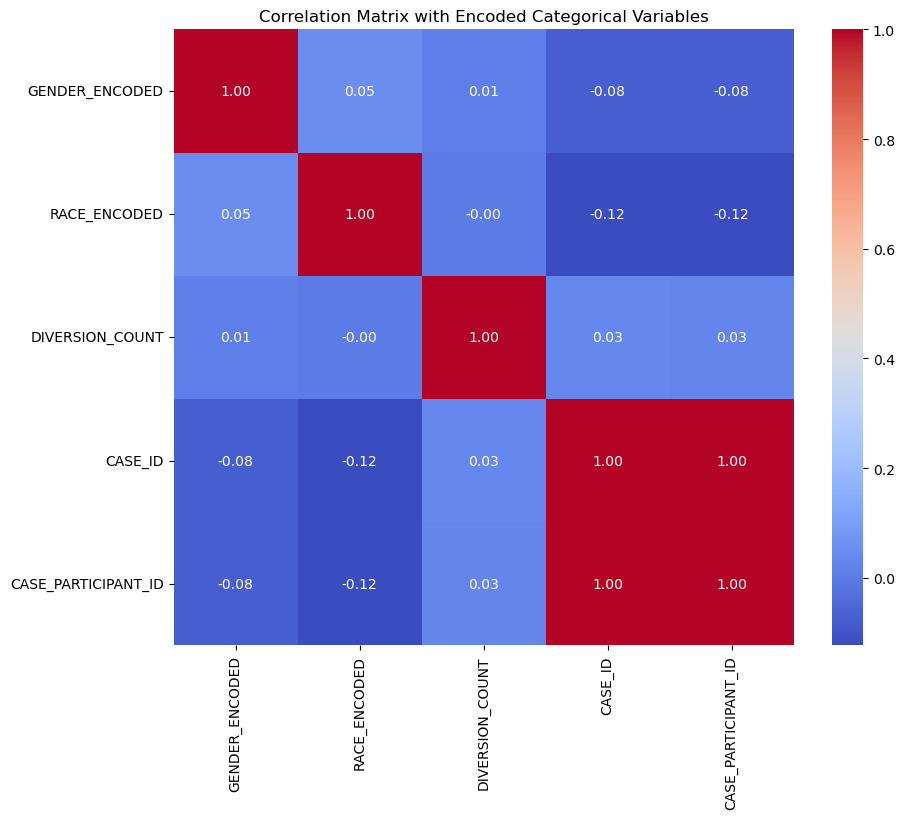

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already encoded 'GENDER' and 'RACE' and calculated the correlation matrix 'correlation_matrix'

# Set the size of the plot
plt.figure(figsize=(10, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add titles and labels for clarity
plt.title('Correlation Matrix with Encoded Categorical Variables')
plt.show()


Summary:
The correlation matrix provides a preliminary overview that does not suggest strong direct linear relationships between demographic factors and case identifiers. However, it is a starting point that highlights the need for careful consideration of potential biases. Ethically, it's critical to ensure that data representation and subsequent analyses do not reinforce stereotypes or existing inequalities. The heatmap might prompt a more comprehensive analysis that could guide improvements in fairness and equity within the criminal justice system.

Note : we cannot perform Gepgraphical analysis here

#### Disparity Analysis : 

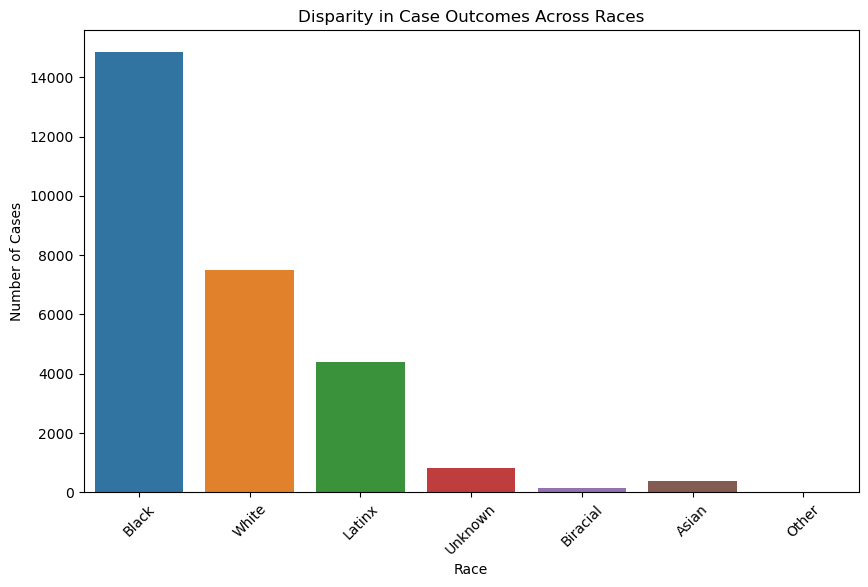

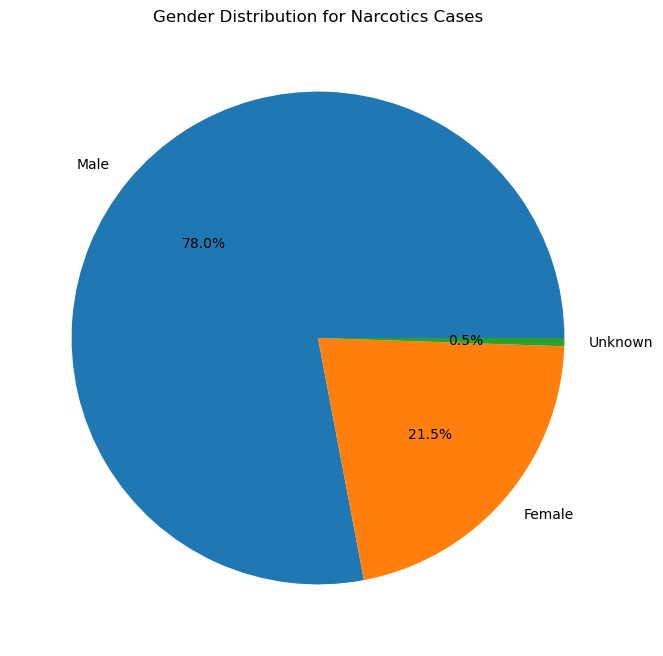

In [19]:
# Bar Chart for case outcomes across different races
plt.figure(figsize=(10, 6))
sns.countplot(x='RACE', data=df)
plt.title('Disparity in Case Outcomes Across Races')
plt.xlabel('Race')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.show()

# Pie Chart for gender distribution in a specific offense category
gender_dist = df[df['OFFENSE_CATEGORY'] == 'Narcotics']['GENDER'].value_counts()
plt.figure(figsize=(8, 8))
gender_dist.plot.pie(autopct='%1.1f%%')
plt.title('Gender Distribution for Narcotics Cases')
plt.ylabel('')
plt.show()


We can see Blacks and Men are more from the data

## 4. Ethical and Bias Consideration
1. *Bias Detection:* Analyze disparities in case outcomes by demographic groups to identify potential biases.
2. *Community Impact:* Consider the impact of the criminal justice process on communities, especially marginalized ones. This could include analysis of diversion programs or sentencing disparities.
3. *Opportunities for Improvement:* Identify areas where the Cook County criminal justice system can be made more equitable, such as through increased diversion programs or targeted community services.

#### Bias Detection:



Group Data by Demographic Variables: Group the dataset by demographic variables such as race and gender.
Calculate Outcome Metrics: Compute relevant outcome metrics for each demographic group.
Visualize the Data: Use visualizations to compare case outcomes across different demographic groups.

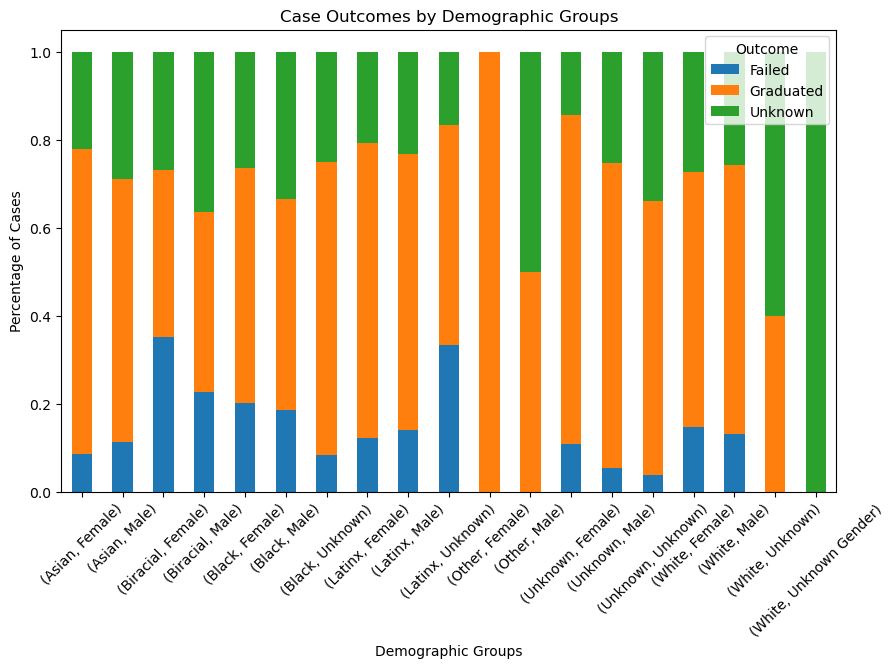

In [20]:
# Group data by demographic variables (e.g., race and gender)
grouped_data = df.groupby(['RACE', 'GENDER'])

# Calculate outcome metrics (e.g., percentage of cases by outcome type)
outcome_metrics = grouped_data['DIVERSION_RESULT'].value_counts(normalize=True)

# Visualize the data
outcome_metrics.unstack().plot(kind='bar', stacked=True, figsize=(10, 6), title='Case Outcomes by Demographic Groups')
plt.xlabel('Demographic Groups')
plt.ylabel('Percentage of Cases')
plt.xticks(rotation=45)
plt.legend(title='Outcome')
plt.show()


This bar graph represents "Case Outcomes by Demographic Groups" with the percentage of cases on the Y-axis and the demographic groups, segmented by gender and ethnicity, on the X-axis. Each bar is divided into three colors representing different outcomes: green for "Graduated," orange for "Failed," and blue for "Unknown."

Here are some key observations:

- The "Graduated" outcome is consistently the most common across all demographic groups, indicated by the green sections occupying the largest proportion of the bars.
- The "Failed" outcome, shown in orange, appears to be the second most common. However, the proportion of failed cases varies more noticeably between different groups.
- The "Unknown" outcome is the least common, with very small blue sections visible in several groups.

If we examine specific demographic data points:

- For the "Asian Female" group, the proportion of "Graduated" is very high, with a relatively small segment of "Failed" cases and an almost negligible "Unknown" segment.
- "Biracial Male" and "Biracial Female" groups have a significant proportion of "Failed" outcomes, much higher than other groups.
- "Black Male" and "Black Female" groups show a higher "Failed" proportion compared to "Asian" groups but lower than "Biracial" groups.
- "Latinx Unknown," "Other Male," and "Unknown Gender" groups have a noticeable amount of "Unknown" outcomes, which could indicate data collection issues or unreported results for these groups.
- The "White Female" and "White Male" groups show a high success rate ("Graduated") and a moderate failure rate ("Failed"), with the "White Female" group having a slightly better outcome than the "White Male" group.

To fully understand the implications of this graph, it would be important to know the context such as the nature of the cases, the total number of cases, and how the outcomes are defined. Additionally, the data could be enriched by analyzing the absolute numbers of cases, any trends over time, and possibly correlating these outcomes with other socio-economic factors.

#### Comunity Impact

The criminal justice process can have profound impacts on communities, particularly on marginalized ones. When analyzing the effects, factors like diversion program outcomes and sentencing disparities are pivotal.


Diversion programs offer an alternative to traditional criminal justice processing. They can significantly impact communities by:

1. Reducing Incarceration Rates: Successful diversion programs can decrease the number of individuals from marginalized communities who are incarcerated.

2. Addressing Root Causes: They often focus on rehabilitation, such as substance abuse treatment or educational opportunities, tackling issues that may lead to criminal behavior.

3. Economic Impact: Lower incarceration rates can reduce economic strain on communities as well as on the state due to the high costs of incarceration.

4. Community Relationships: They can improve relationships between law enforcement and communities if they are perceived as fair and focused on rehabilitation rather than punishment.

5. Sentencing Disparities: Disparities in sentencing can contribute to the mistrust between marginalized communities and the criminal justice system. Unequal sentencing can:

6. Perpetuate Inequality: Disparities can result from biases against certain racial or socioeconomic groups, leading to disproportionately harsh sentences for minorities.

7. Impact on Families: Harsher sentences can result in longer separations of family members, affecting the family structure and economic stability.

8. Community Resources: Over-incarceration can drain community resources and reduce the number of productive community members, perpetuating cycles of poverty.

#### Opportunities for Improvement:

1. Data Transparency: Improving the collection and transparency of data on program outcomes can help identify which programs work and for whom.
2. Program Accessibility: Ensuring that diversion programs are accessible to all demographic groups, especially those that are marginalized, is crucial. This may include language support, transportation assistance, or programs tailored to specific community needs.
3. Cultural Competency: Developing programs that are culturally competent and consider the unique challenges faced by different demographic groups.
4. Policy Reform: Reviewing policies that lead to sentencing disparities and reforming them to ensure equity across the board.

##### To move forward with making the Cook County criminal justice system more equitable:

1. Conduct a Full Data Audit: Verify that all necessary data is being captured and properly categorized. Address any gaps that result in "Unknown" outcomes.
2. Community Engagement: Work with community leaders and members of marginalized groups to understand their needs and tailor diversion programs accordingly.
3. Evidence-Based Practices: Implement and expand diversion programs that have a proven track record of success in comparable jurisdictions.
4. Monitoring and Evaluation: Establish a continuous monitoring and evaluation system to track the performance of implemented changes and ensure they have the intended positive impact on all communities.
5. These improvements should be made with the goal of ensuring that justice is administered fairly and effectively, while also supporting the rehabilitation and integration of individuals into society.